<a href="https://colab.research.google.com/github/ppunkz/Portfolio/blob/master/Covariate%20shift%20testing%20on%20%20santander-customer-transaction-prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

In [ ]:
#loading test and train data
train = pd.read_csv('train.csv', low_memory=True)
test = pd.read_csv('test.csv',low_memory=True)

In [ ]:
#adding a column to identify whether a row comes from train or not
test['is_train'] = 0
train['is_train'] = 1 

In [ ]:
df_combine = pd.concat([train, test], axis=0, ignore_index=True, sort=True)
df_combine

,ID_code,is_train,target,var_0,var_1,var_10,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_11,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_12,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_13,var_130,...,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_7,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_8,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_9,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99
0,train_0,1,0.0,8.9255,-6.7863,2.9252,9.4763,13.3102,26.5376,1.4403,14.7100,6.0454,9.5426,17.1554,14.1104,24.3627,3.1821,2.0323,6.7602,3.9141,-0.4851,2.5240,1.5093,2.5516,15.5752,-13.4221,7.2739,14.0137,16.0094,9.7268,0.8897,0.7754,4.2218,12.0039,13.8571,-0.7338,-1.9245,15.4462,0.5745,12.8287,...,-0.2154,8.6748,9.5319,5.8056,22.4321,5.0109,-4.7010,18.6266,21.6374,0.5663,5.1999,8.8600,43.1127,18.3816,-2.3440,23.4104,6.5199,12.1983,-4.9200,13.6468,13.8372,1.3675,2.9423,-4.5213,21.4669,9.3225,16.4597,7.9984,-1.7069,5.7470,-21.4494,6.7806,11.0924,9.9913,14.8421,0.1812,8.9642,16.2572,2.1743,-3.4132
1,train_1,1,0.0,11.5006,-4.1473,-0.4032,-13.6950,8.4068,35.4734,1.7093,15.1866,2.6227,7.3412,32.0888,13.9550,13.0858,8.0585,6.6203,7.1051,5.3523,8.5426,3.6159,4.1569,3.0454,7.8522,-11.5100,7.5109,14.0239,31.5899,9.5018,8.2736,10.1633,0.1225,12.5942,14.5697,2.4354,0.8194,16.5346,8.4135,12.4205,...,-1.3147,8.1042,1.5365,5.4007,7.9344,5.0220,2.2302,16.5338,40.5632,0.5134,3.1701,20.1068,7.7841,7.0529,3.2709,23.4822,5.5075,13.7814,3.1468,2.5462,18.1782,0.3683,-4.8210,-5.4850,13.7867,-13.5901,11.0993,7.9022,12.2301,8.0851,0.4768,6.8852,8.0905,10.9631,11.7569,-1.2722,24.7876,26.6881,1.8944,0.6939
2,train_2,1,0.0,8.6093,-2.7457,-0.3249,-0.3939,12.6317,14.8863,1.3854,15.0284,3.9995,5.3683,8.6273,14.1963,20.3882,-11.2648,3.2304,5.7033,4.5255,2.1929,3.1290,2.9044,1.1696,28.7632,-17.2738,2.1056,14.1929,21.1613,8.9573,2.7768,-2.1746,3.6932,12.4653,14.1978,-2.5511,-0.9479,17.1092,7.3124,11.5419,...,5.8042,3.7163,-1.1016,7.3667,9.8565,5.0228,-5.7828,14.6155,2.3612,0.8520,6.3577,12.1719,19.7312,19.4465,4.5048,23.2378,6.3191,12.8046,-4.9193,7.4729,15.7811,13.3529,10.1852,5.4604,19.0773,-4.4577,9.5413,11.9052,2.1447,5.9525,-22.4038,7.0883,14.1613,10.5080,14.2621,0.2647,20.4031,17.0360,1.6981,-0.0269
3,train_3,1,0.0,11.0604,-2.1518,2.3061,-19.8592,22.5316,18.6129,1.3512,9.3291,4.2835,10.3907,7.0874,14.3256,14.4135,2.8102,4.2827,6.9750,1.6480,11.6896,2.5762,-2.5459,5.3446,38.1015,3.5732,5.0988,13.8463,30.5644,11.3025,3.9618,-8.2464,2.7038,12.3441,12.5431,-1.3683,3.5974,13.9761,11.9704,14.3003,...,-4.3923,8.6464,6.3072,5.6221,23.6143,5.0220,-3.9989,14.9250,4.0462,0.2500,1.2516,24.4187,4.5290,15.4235,11.6875,23.6273,4.0806,15.2733,-5.8609,0.7839,10.5404,1.6212,-5.2896,1.6027,17.9762,-2.3174,15.6298,4.5474,7.5509,8.2450,-7.5866,7.0364,14.4027,10.7795,7.2887,-1.0930,11.3596,18.1486,2.8344,1.9480
4,train_4,1,0.0,9.8369,-1.4834,-9.4458,-22.9264,12.3562,17.3410,1.6940,7.1179,5.1934,8.8230,10.6617,14.0837,28.2749,-12.1419,-0.1937,5.9654,1.0719,7.9923,2.9138,-3.6135,1.4684,25.6795,13.8224,4.7478,13.8481,41.1037,12.7140,5.2964,9.7289,3.9370,12.1316,12.5815,7.0642,5.6518,10.9346,7.8895,11.4266,...,-1.7839,5.2670,-4.3205,6.9860,1.6184,5.0301,-3.2431,19.2514,40.1236,0.7737,-0.7264,4.5886,-4.5346,23.3521,1.0273,19.1600,7.1734,14.3937,6.2654,2.9598,13.3317,-9.2587,-6.7075,7.8984,14.5265,7.0799,20.1670,8.0053,3.7954,7.6784,-39.7997,7.0065,9.3627,10.4316,14.0553,0.0213,14.7246,35.2988,1.6844,0.6715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,test_199995,0,NaN,13.1678,1.0136,2.6802,0.0951,9.7517,28.6119,1.7

In [ ]:
#dropping ‘target’ column as it is not present in the test
df_combine = df_combine.drop('target', axis =1)
df_combine = df_combine.drop('ID_code', axis =1)

y = df_combine['is_train'].values #labels
x = df_combine.drop('is_train', axis=1).values #covariates or our independent variables

tst, trn = test.values, train.values


In [ ]:
m = RandomForestClassifier(n_jobs=-1, max_depth=5, min_samples_leaf = 5)
predictions = np.zeros(y.shape) #creating an empty prediction array

In [ ]:
skf = StratifiedKFold(n_splits=20, shuffle=True, random_state=100)
for fold, (train_idx, test_idx) in enumerate(skf.split(x, y)):
 X_train, X_test = x[train_idx], x[test_idx]
 y_train, y_test = y[train_idx], y[test_idx]
 


In [ ]:
 m.fit(X_train, y_train)
 probs = m.predict_proba(X_test)[:, 1] #calculating the probability
 predictions[test_idx] = probs

In [ ]:
print('ROC-AUC for train and test distributions:', roc_auc_score(y, predictions))

ROC-AUC for train and test distributions: 0.50003232295


(array([10000.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 10000.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

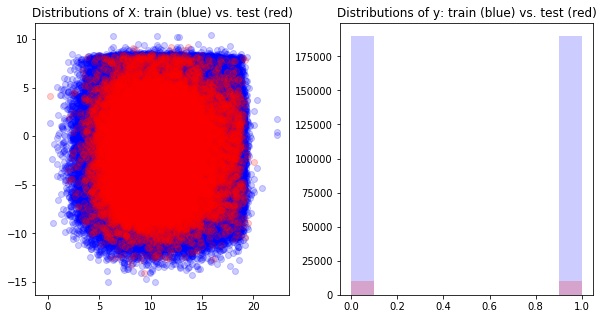

In [ ]:
f,axs=plt.subplots(1,2, figsize=(10,5))
axs[0].scatter(X_train[:,0],X_train[:,1], color='b', alpha=.2)
axs[0].scatter(X_test[:,0],X_test[:,1], color='r', alpha=.2)
axs[0].set_title('Distributions of X: train (blue) vs. test (red)')

axs[1].set_title('Distributions of y: train (blue) vs. test (red)')
axs[1].hist(y_train, color='b', alpha=.2)
axs[1].hist(y_test, color='r', alpha=.2)